#Classes:

In [1]:
class Visualizations_Class:
    def plot_heatmap(self, x):
        colormap = plt.cm.viridis
        plt.figure(figsize=(30,30))
        sns.heatmap(x.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

    def plot_Histogram(self, feature_name, dataFrameName):
      sns.set(style='ticks', palette='bright', font_scale=1)
      fig, ax=plt.subplots(figsize=(2,2))
      plt.hist(dataFrameName[feature_name], bins=15, color='b')
      plt.xlabel(feature_name)
      plt.ylabel('count')
      plt.show()

    def plot_scatteredplot(self, feature_name1,feature_name2, dataFrameName):
      fig, ax=plt.subplots(figsize=(2,2))
      plt.scatter(dataFrameName[feature_name1],dataFrameName[feature_name2],s=10,c='g')
      plt.xlabel(feature_name1)
      plt.ylabel(feature_name2)
      plt.show()




In [2]:
class My_Functions:
    
    def redefine_target_feature(self, x):
        print('\033[1m' + '\n Redifining the Target Feature to :\n 0 - Normal, 1 - Prediabetic, 2 - diabetic: \n' + '\033[0m')
        # 0 - Normal, 1 - Prediabetic, 2 - diabetic
        df_diabetes_final = x
        df_diabetes_final.loc[df_diabetes_final['GlycoHemoglobin'] < 5.7, 'Diabetes'] = 0
        df_diabetes_final.loc[(df_diabetes_final['GlycoHemoglobin'] >= 5.7) & (df_diabetes_final['GlycoHemoglobin'] <= 6.4), 'Diabetes'] = 1
        df_diabetes_final.loc[df_diabetes_final['GlycoHemoglobin'] >= 6.5, 'Diabetes'] = 2

        return df_diabetes_final

    def check_for_nulls_per(self, x):
        table = {'\033[1m' + '\n Null Values By Count \n' + '\033[0m' :  x.isna().sum().sort_values(ascending=True),
                 '\033[1m' + '\n Null Values By Percentage \n' + '\033[0m': round((x.isnull().sum() * 100/ len(x)),2).sort_values(ascending=True),
            }
        table_df = pd.DataFrame(table)
        with pd.option_context('display.max_rows', None,):
            print(table_df)
        
    
    def remove_outliers_by_target(self):
        print('\033[1m' + '\n Boxplot: \n' + '\033[0m')
        sns.boxplot(df_main['GlycoHemoglobin'])
        plt.show()

        values = (np.where(df_main['GlycoHemoglobin']>15))
        values_1 = np.ravel(values)
        print("Outliers are :", values_1)
        df_main.drop(values_1, inplace=True)
        

    def treat_by_lambda(self, x, column_names):
        for col in column_names:
            x[col] = x[col].apply(lambda i: i if i > 0 else 0)

        return x

    def treat_by_mode(self, x, column_names):
        for col in column_names:
            x[col] = x[col].fillna(x[col].mode()[0])

        return x

    def treat_by_median(self, x, column_names):
        for col in column_names:
            x[col] = x[col].fillna(x[col].median())

        return x

    def treat_by_one(self, x, column_names):
        for col in column_names:
            x[col] = x[col].fillna(value = 1)

        return x

    def treat_by_mean(self, x, column_names):
        for col in column_names:
            x[col] = x[col].fillna(x[col].mean())

        return x

    def treat_by_ffil(self, x, column_names):
        for col in column_names:
            x[col] = x[col].fillna(method='ffill')

        return x
    
    def corr_matrix_abs(self, x):
        corr_matrix = x.corr().abs() # Create correlation matrix
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)) # Select upper triangle of correlation matrix
        to_drop = [column for column in upper.columns if any(upper[column] > 0.80)] # Find features with correlation greater than 0.80
        x.drop(to_drop, axis=1, inplace=True) # Drop  
        return x

    def select_best_40_features(self, x):
        corr_matrix = x.corr() # Compute the correlation matrix
        pos_corr_cols = corr_matrix.nlargest(20, "LBXGH")["LBXGH"].index.tolist() # Select the top 20 most positively correlated columns
        neg_corr_cols = corr_matrix.nsmallest(20, "LBXGH")["LBXGH"].index.tolist() # Select the top 20 most negatively correlated columns
        selected_cols = pos_corr_cols + neg_corr_cols # Combine the lists of positively and negatively correlated columns
        selected_cols.append('SEQN')
        x = x[selected_cols]
        return x

    def check_correlation_matrix(self, x):
        corr_matrix = x.corr()
        print(corr_matrix["LBXGH"].sort_values(ascending=False))
    
    def save_file_csv(self, x, file_name):
        folder_path = '/content/drive/Shared drives/Data Mining Project/Data Mining Project/Merged Data/'
        # file_name = 'final_csv.csv'
        file_name = folder_path + file_name
        # file_path = os.path.join(folder_path, file_name)
        x.to_csv(file_name, index=False, encoding="utf-8")

    def remove_40_perc_null_features(self, x):
        null_percentage = (x.isnull().sum() / len(x)) * 100
        null_columns = list(null_percentage[null_percentage >= 40].index)
        x = x.drop(null_columns, axis=1)
        print('\033[1m' + '\n Dropping ',len(null_columns),'features \n' + '\033[0m')
        return x

In [3]:
class Feature_Importance:  
    # Anova Feature Importance: 
    def print_importances(self, n):
        model = SelectKBest(f_classif,k=20)
        model.fit(x, y)
        # summarize scores
        set_printoptions(precision=3)
        features_ordered = model.scores_.argsort()[-n:][::-1]
        print('\033[1m' + '\n The most important ',n,'features: \n' + '\033[0m')
        for i in range(n):
            print(i,'-',x.columns[features_ordered[i]],': ',np.sort(model.scores_)[-n:][::-1][i])

        return features_ordered, model.scores_

    def feature_imp_plot(self, features_ordered, scores_, n):
        imp_features = []
        anova_scores = []
        for i in range(n):
            imp_features.append(x.columns[features_ordered[i]])
            anova_scores.append(np.sort(scores_)[-n:][::-1][i])

        self.draw_plot(imp_features, anova_scores)

    def draw_plot(self, x, y):
        fig, ax = plt.subplots(figsize=(20, 10))
        ax.bar(x, y, color='#52796f')
        plt.xticks(rotation=45)
        plt.show()

    def feature_imp(self, model_name, model, X_train):    

      print('\033[1m')
      print(f"Plotting the Feature Importance Graph for the {model_name} :")
      print('\033[0m')
      figure(figsize=(15, 10), dpi=80)

      feat_imp_sort = model.feature_importances_.argsort()
      X_axis = X_train.columns[feat_imp_sort]
      Y_axis = model.feature_importances_[feat_imp_sort]
      X_axis = X_axis[-20:]
      Y_axis = Y_axis[-20:]
      plt.barh(X_axis, Y_axis, color='teal')
      plt.title("Feature Importance - Top 20 Features", fontweight='bold')
      plt.grid(False)
      plt.show()

    def plot(self, y_test, pred, model_name):
      #Plotting Actual Vs Pred

        if model_name == "CatBoostClassifier":
            y_test_f = np.ravel(y_test)
            Actual_Pred = pd.DataFrame({'Actual': y_test_f['Diabetes'], 'Predicted': pred, 'Diff' : pred - y_test_f['Diabetes']})
        else:
            Actual_Pred = pd.DataFrame({'Actual': y_test['Diabetes'], 'Predicted': pred, 'Diff' : pred - y_test['Diabetes']})

        Actual_Pred = Actual_Pred.head(25)
        round(Actual_Pred,2)

        Result = Actual_Pred[['Actual','Predicted']]
        Result = Result.reset_index(drop=True)

        Result.plot(marker='o',figsize=(20,7))
        plt.title('Actual vs Predicted', fontsize=14)
        plt.ylabel('Diabetes', fontsize=14)
        plt.grid(False)
        plt.show() 

    def model_selected(self , model_name):

      if model_name == 'CatBoostClassifier':
        model = CatBoostClassifier(verbose=False)
      elif model_name == 'XGBClassifier':
        model = XGBClassifier()
      elif model_name == 'RandomForestClassifier':
        model = RandomForestClassifier()  
      else:
        print("Invalid Model Name!! Please give a proper model name!")
      return model

    # Function for training the model
    def model_train(self , model_name, X_train, y_train, X_test, y_test):

      model = self.model_selected(model_name)
      train_fit = model.fit(X_train, y_train)
      #Evaluating the model on the test dataset
      model_score = model.score(X_test, y_test)
      pred = model.predict(X_test)
      mse = mean_squared_error(y_test, pred)
      rmse = (np.sqrt(mean_squared_error(y_test, pred)))
      r2 = r2_score(y_test, pred)
      acc_score = accuracy_score(y_test, pred) * 100
      print('\033[1m')
      print(f"Testing Performance Metrics for the {model_name} :")
      print('\033[0m')
      print("                            R2: {:.2f}".format(r2))
      print("      Mean Squared Error (MSE): {:.2f}".format(mse))
      print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
      print("                      Accuracy: {:.2f}%".format(acc_score))

      if model_name == 'CatBoostClassifier':
        self.feature_imp(model_name, model, X_train)
        # plot(y_test, pred, model_name)
      elif model_name == 'XGBClassifier':
        self.feature_imp(model_name, model, X_train)
        self.plot(y_test, pred, model_name)
      elif model_name == 'RandomForestClassifier':
        self.feature_imp(model_name, model, X_train)
        self.plot(y_test, pred, model_name)  

    def logistics_model(self, X_train,y_train,X_test,y_test):
        lr = sm.MNLogit(y_train, sm.add_constant(X_train), C = 1, solver = 'liblinear',
                 random_state = 20)

        # Fit the model
        result = lr.fit(method='bfgs')

        # Perform feature selection based on p-values and confidence level
        pvalues = result.pvalues[1:]
        significant_features = pvalues[pvalues <= 0.05]
        selected_features = significant_features.index.tolist()

        # Transform training and testing data to contain only selected features
        X_train_selected = X_train[selected_features]
        X_test_selected = X_test[selected_features]

        # Fit logistic regression model on selected features
        lr_selected = sm.MNLogit(y_train, sm.add_constant(X_train_selected))
        result_selected = lr_selected.fit(disp=0)

        # Evaluate model on test set
        y_pred = result_selected.predict(sm.add_constant(X_test_selected))
        y_pred_class = [np.argmax(y) for y in y_pred.values]

        # Compute confusion matrix
        cm = confusion_matrix(y_test, y_pred_class)

        # Plot confusion matrix
        sns.set(font_scale=1.4)
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'], annot_kws={"size": 16})
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
        print(classification_report(y_test, y_pred_class))

        print('\033[1m')
        print(f"Selected Features:")
        print('\033[0m')
        len(selected_features)

        # Get the sorted list of features based on their coefficients
        features_with_coef = pd.DataFrame(list(zip(X_train_selected.columns, result_selected.params[1:])), columns=['Feature', 'Coefficient'])
        features_sorted_by_coef = features_with_coef.sort_values('Coefficient', ascending=False)

        # Get the top 20 significant features based on their coefficients
        top_20_features = features_sorted_by_coef.head(20)['Feature'].tolist()

        # Print the top 20 significant features
        print('\033[1m')
        print(f"Top 20 significant features:")
        print('\033[0m')
        print(top_20_features)

# ExtraTree Classifier Feature selection model

    def ExtraTreesClassifier(self, X_train,y_train,X_test,y_test):
      clf = ExtraTreesClassifier()
      clf.fit(X_train, y_train)

      feature_importances = clf.feature_importances_
      feature_imp = sorted(zip(feature_importances, X_train.columns), reverse=True)
      result = [(name, round(score, 4)) for score, name in feature_imp]

      low_variance_cols = [name for score, name in feature_imp if score < 0.002]

      print("Features sorted by their score:")
      print(result)
      print()
      print("Low variance columns: ", low_variance_cols)

      y_axis = [v for v, k in result]
      x_axis= [k for v, k in result]

      plt.figure(figsize=(20,8))
      plt.bar(y_axis, x_axis)
      plt.xticks(rotation=90)
      plt.xlabel("Features",fontsize=18)
      plt.ylabel("Importance",fontsize=18)
      plt.title("Plot of features and their importance from ETC",fontsize=18)
      plt.grid()
      plt.show()

      sfm = SelectFromModel(clf, threshold=0.002)
      sfm.fit(X_train, y_train)
      support_idx = list(sfm.get_support())
      selected_features = X_train.columns[support_idx]

      X_train_selected = X_train[selected_features]
      X_test_selected = X_test[selected_features]
      

      print("Selected features: ", selected_features)
    
      print("Top 20 features sorted by their score:")
      for score, name in feature_imp[:20]:
          print("{}: {}".format(name, round(score, 4)))

    def LogisticRegression(self, n):
      model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
      model.fit(x, y)
      feature_importance = abs(model.coef_[0])
      feature_importance = 100.0 * (feature_importance / feature_importance.max())
      sorted_idx = np.argsort(feature_importance)[-n:]
      for idx in sorted_idx:
          print('Feature: %s, Importance: %f' % (x.columns[idx], feature_importance[idx]))
        # Creating a feature selector model
      feature_selector = SelectFromModel(model, prefit=True, threshold=-np.inf, max_features=n)
        # Transforming the dataset to include only important features
      x_imp = feature_selector.transform(x)
      print(x_imp)
      return


  

# New Section



```
# Installing Required Packages
```



In [4]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.4 MB/s eta 0:00:00


In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest ,  f_classif
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from matplotlib.pyplot import figure
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import warnings
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.model_selection import train_test_split
import numpy as np


warnings.filterwarnings("ignore")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Classes Object:

In [7]:
func = My_Functions()
feature_imp = Feature_Importance()
viz = Visualizations_Class()

# Loading Dataset:

In [8]:
!gdown --id 1TusZNP0KOIqOZlGNyYwfdyE0KeEZvA3K

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1TusZNP0KOIqOZlGNyYwfdyE0KeEZvA3K
To: /content/merge_dataset_simmi.csv
100% 83.5M/83.5M [00:00<00:00, 110MB/s]


In [9]:
df_main = pd.read_csv('merge_dataset_simmi.csv')

# EDA:

In [10]:
df_main.head(5)

,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73557,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
2,73558,1.0,NaN,NaN,NaN,NaN,1.0,NaN,7.0,1.0,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
3,73558,1.0,NaN,NaN,NaN,NaN,1.0,NaN,7.0,1.0,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
4,73558,1.0,NaN,NaN,NaN,NaN,1.0,NaN,7.0,1.0,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78


In [11]:
func.check_for_nulls_per(df_main)

            \n Null Values By Count \n  \
ACD011A                                   6544   
ACD011B                                  19538   
ACD011C                                  19298   
ACD040                                   15704   
ACD110                                   18058   
AGQ030                                   16609   
AIALANGA                                  7531   
ALQ101                                    5543   
ALQ110                                   15206   
ALQ120Q                                   7857   
ALQ120U                                  11260   
ALQ130                                   11249   
ALQ141Q                                  11253   
ALQ141U                                  16876   
ALQ151                                    7867   
ALQ160                                   15731   
AUQ136                                    7320   
AUQ138                                    7320   
BMDAVSAD                                  4071   
BMDBMIC 

In [12]:
df_main.describe()

,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
count,19580.000000,13036.0,42.0,282.0,3876.000000,1522.000000,14037.000000,4374.000000,11723.000000,8320.000000,...,19142.000000,19450.000000,9986.000000,19580.000000,19580.000000,19580.000000,19580.000000,19362.000000,19382.000000,18218.000000
mean,78544.159704,1.0,8.0,9.0,3.042570,2.835742,1.333048,1.559442,4.655037,1.997476,...,3.443841,2.525758,3.583717,33975.859843,35032.541408,1.480899,111.048366,10.247237,9.896966,2.264044
std,2935.456571,0.0,0.0,0.0,1.572504,1.744897,0.627457,0.699882,40.108653,0.871953,...,1.260599,5.160021,1.284339,29465.235601,30183.463450,0.499648,4.219822,13.376386,13.135302,1.596804
min,73557.000000,1.0,8.0,9.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,3697.772098,3748.417657,1.000000,104.000000,1.000000,1.000000,0.000000
25%,75978.000000,1.0,8.0,9.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,3.000000,1.000000,3.000000,14404.169400,14886.177017,1.000000,107.000000,5.000000,4.000000,0.930000
50%,78503.000000,1.0,8.0,9.0,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000,...,4.000000,1.000000,4.000000,22593.937563,23431.848747,1.000000,111.000000,7.000000,7.000000,1.740000
75%,81063.000000,1.0,8.0,9.0,4.000000,5.000000,2.000000,2.000000,3.000000,3.000000,...,4.000000,3.000000,5.000000,40079.239311,41986.888028,2.000000,115.000000,14.000000,13.000000,3.560000
max,83731.000000,1.0,8.0,9.0,9.000000,5.000000,9.000000,9.000000,999.000000,3.000000,...,9.000000,99.000000,9.000000,167884.543709,171395.264901,2.000000,118.000000,99.000000,99.000000,5.000000


# Data Cleaning:

In [13]:
df_main = df_main.dropna(subset=['SEQN'])

*Before Dropping:* 

In [14]:
df_main.shape

(19580, 1824)

##### *Dropping features with 40% or more nulls*

In [15]:
df_main = func.remove_40_perc_null_features(df_main)


 Dropping  1267 features 



*After Dropping:*

In [16]:
df_main.shape

(19580, 557)

In [17]:
df_main.head(5)

,SEQN,ACD011A,ALQ101,BPQ020,BPQ056,BPQ059,BPQ080,BPQ070,BPQ090D,CBD070,...,DMDHRBR4,DMDHREDU,DMDHRMAR,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,300.0,...,1.0,3.0,4.0,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73557,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,300.0,...,1.0,3.0,4.0,13281.237386,13481.042095,1,112,4.0,4.0,0.84
2,73558,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,642.0,...,1.0,3.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
3,73558,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,642.0,...,1.0,3.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
4,73558,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,642.0,...,1.0,3.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78


In [18]:
func.check_for_nulls_per(df_main)

            \n Null Values By Count \n  \
ACD011A                                   6544   
AIALANGA                                  7531   
ALQ101                                    5543   
AUQ136                                    7320   
AUQ138                                    7320   
BMDAVSAD                                  4071   
BMDSTATS                                     0   
BMXARMC                                   1252   
BMXARML                                   1254   
BMXBMI                                    1058   
BMXHT                                     1006   
BMXLEG                                    3585   
BMXSAD1                                   4071   
BMXSAD2                                   4071   
BMXWAIST                                  2132   
BMXWT                                      279   
BPAARM                                    2905   
BPACSZ                                    2871   
BPAEN1                                    2889   
BPAEN2  

##### *Selecting top 40 most Correlated features:*

In [19]:
df_main = func.corr_matrix_abs(df_main)

In [20]:
func.check_correlation_matrix(df_main)

LBXGH       1.000000
LBXSGL      0.776060
LBXSOSSI    0.327176
RIDAGEYR    0.291449
HUQ010      0.229003
              ...   
DIQ010     -0.522592
ACD011A          NaN
HSAQUEX          NaN
SDDSRVYR         NaN
RIDSTATR         NaN
Name: LBXGH, Length: 425, dtype: float64


In [21]:
df_main = func.select_best_40_features(df_main)

In [22]:
df_main.shape

(19580, 41)

*Dropping Duplicates:*

In [23]:
df_main = df_main.drop_duplicates().reset_index(drop=True)

In [24]:
print(df_main.columns)

Index(['LBXGH', 'LBXSGL', 'LBXSOSSI', 'RIDAGEYR', 'HUQ010', 'LBXSTR',
       'RXDCOUNT', 'HSD010', 'LBXSBU', 'URXUMA', 'BPACSZ', 'OHX03TC',
       'OHX14TC', 'OHX18TC', 'OHX13TC', 'OHX04TC', 'DMDHRAGE', 'OHX30TC',
       'OHX19TC', 'OHX15TC', 'DIQ010', 'DIQ050', 'MCQ365A', 'MCQ365D',
       'RXDUSE', 'MCQ365B', 'MCQ365C', 'LBXSCLSI', 'LBXSAL', 'MCQ080',
       'BPQ020', 'LBDHDD', 'BPQ090D', 'LBXSNASI', 'MCQ370C', 'WHQ030',
       'BMXLEG', 'RXQ510', 'LBXSIR', 'PAAQUEX', 'SEQN'],
      dtype='object')


In [25]:
df_main.shape

(9813, 41)

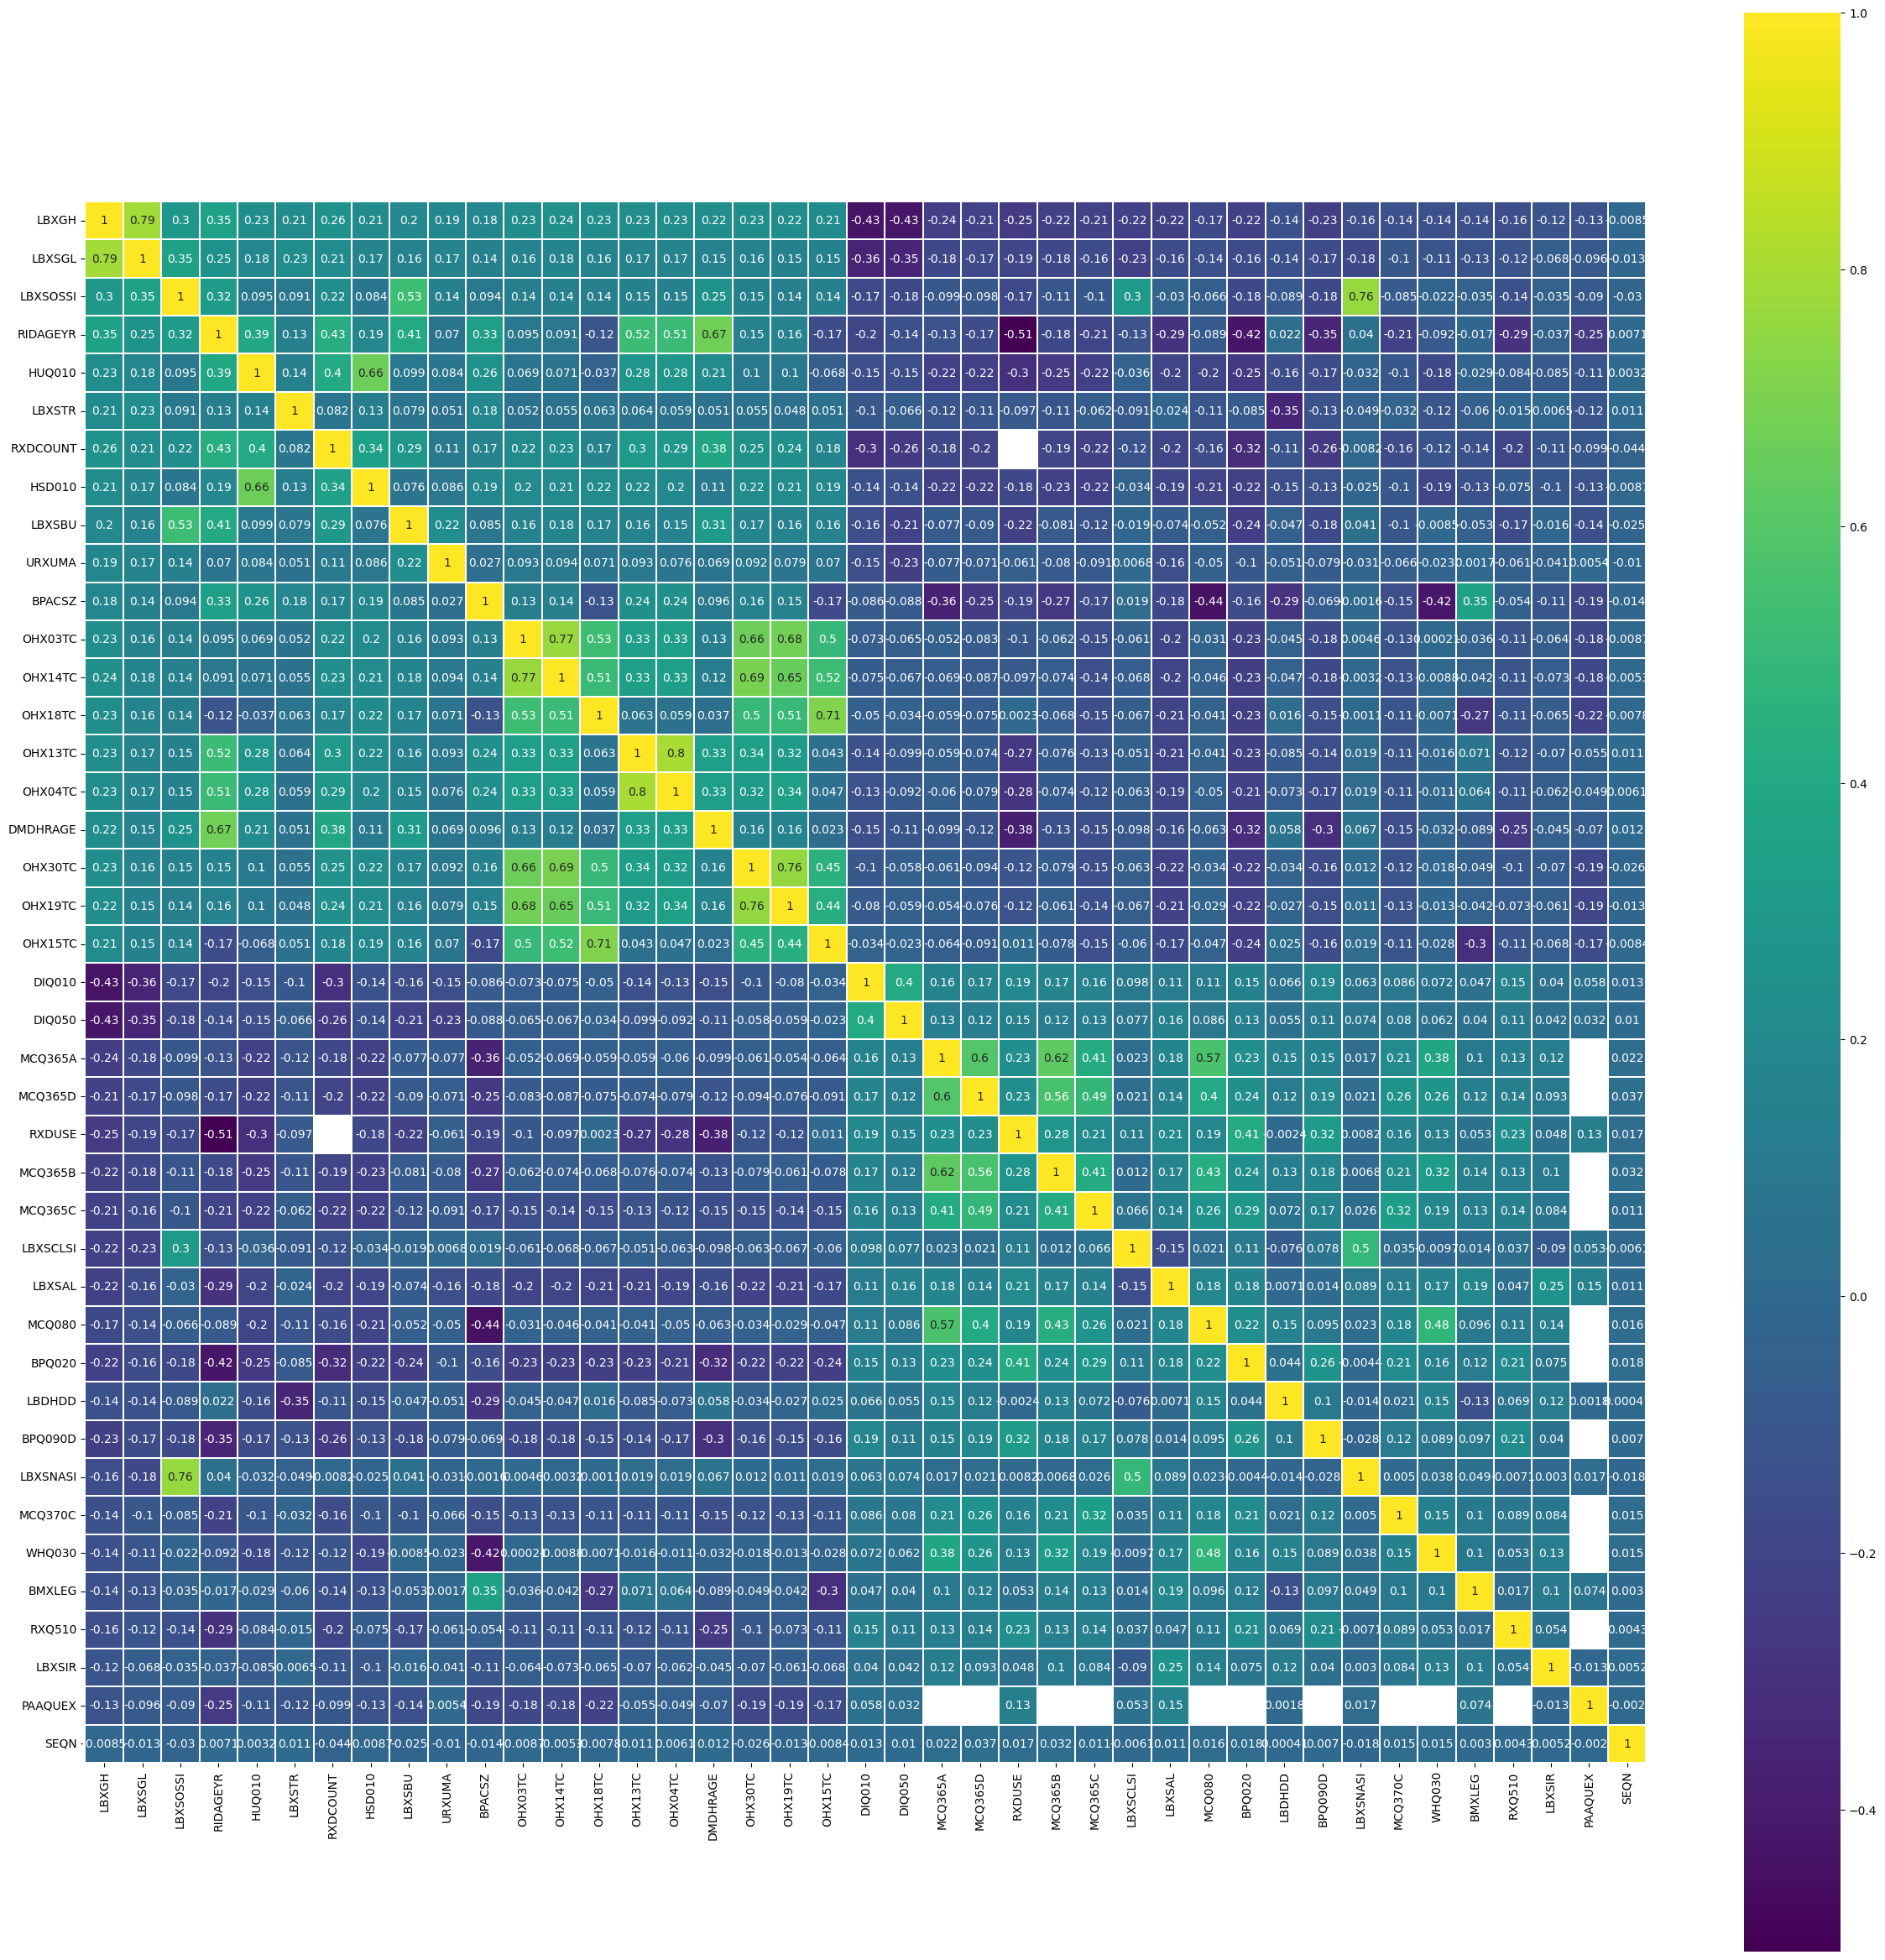

In [26]:
viz.plot_heatmap(df_main)

##### *Feature Renaming:*

In [27]:
df_main = df_main.rename(columns = {'LBXGH' : 'GlycoHemoglobin',
                                    'LBXSGL': 'Glucose_lab',
                                    'LBXSOSSI': 'Osmolality_lab',
                                    'RIDAGEYR' : 'Age_while_screening',
                                    'LBXSTR': 'Triglycerides_lab',
                                    'LBXSBU':'Blood_urea_nitrogen_lab',
                                    'URXUMA':'Albumin_urine_lab',
                                    'LBXSCLSI' : 'Chloride_lab',
                                    'LBXSAL':'Albumin_lab',
                                    'LBDHDD':'Direct_HDL_Cholesterol_lab',
                                    'LBXSNASI' :'Sodium_lab',
                                    'LBXSIR': 'Iron_lab',
                                    'DIQ010': 'SP_diagnosed_diabetes',
                                    'DIQ050': 'Taking_insulin',
                                    'HUQ010': 'Health_conditions_by_hospital',
                                    'RXDUSE': 'Have_taken_any_med_in_30days',
                                    'RXDCOUNT': 'Total_prescribed_meds',
                                    'HSD010': 'Current_health_status',
                                    'MCQ365D': 'Advised_to_reduce_FatOrCalories',
                                    'MCQ365A': 'Advised_to_ControlOrLoseWeight',
                                    'MCQ365B': 'Advised_to_increase_PhysicalActivityOrExercise',
                                    'MCQ365C': 'Aadvised_to_reduce_sodium',
                                    'MCQ080': 'Overweight',
                                    'MCQ370C': 'Reduced_salt_consumption',
                                    'WHQ030': 'Weight_history',
                                    'PAAQUEX': 'Increasing_weight',
                                    'OHX14TC': 'TC_UL_1Molar',
                                    'OHX18TC': 'TC_LL_2Molar',
                                    'OHX13TC': 'TC_UL_2BicuspidOrPrimaryMolar',
                                    'OHX04TC': 'TC_UP_2BicuspidOr2Molar',
                                    'OHX30TC': 'TC_LR_1Molar',
                                    'OHX19TC': 'TC_LL_1Molar',
                                    'OHX15TC': 'TC_UL_2Molar',
                                    'OHX03TC': 'TC_UR_1Molar',
                                    'BPACSZ': 'BP_cuff_size',
                                    'BMXLEG': 'Body_measurement_upper_leg',
                                    'BPQ090D': 'ever_percsribed_med_lower_cholestrol',
                                    'RXQ510': 'ever_perscribed_aspirin',
                                    'BPQ020': 'Doc_ever_told_SP_high_BP',
                                    'DMDHRAGE': 'HH_person_age_in_years'
                                })

##### *Redifing Target Feature*

In [28]:
df_main = func.redefine_target_feature(df_main)
df_main.head()


 Redifining the Target Feature to :
 0 - Normal, 1 - Prediabetic, 2 - diabetic: 



,GlycoHemoglobin,Glucose_lab,Osmolality_lab,Age_while_screening,Health_conditions_by_hospital,Triglycerides_lab,Total_prescribed_meds,Current_health_status,Blood_urea_nitrogen_lab,Albumin_urine_lab,...,ever_percsribed_med_lower_cholestrol,Sodium_lab,Reduced_salt_consumption,Weight_history,Body_measurement_upper_leg,ever_perscribed_aspirin,Iron_lab,Increasing_weight,SEQN,Diabetes
0,13.9,554.0,296.0,69,2,140.0,2.0,2.0,10.0,4.3,...,1.0,136.0,1.0,3.0,39.2,1.0,58.0,1.0,73557,2.0
1,9.1,219.0,265.0,54,4,257.0,4.0,4.0,16.0,153.0,...,1.0,128.0,2.0,3.0,40.0,1.0,79.0,1.0,73558,2.0
2,8.9,183.0,288.0,72,3,51.0,5.0,3.0,14.0,11.9,...,1.0,142.0,2.0,3.0,40.0,2.0,98.0,1.0,73559,2.0
3,NaN,NaN,NaN,9,2,NaN,NaN,NaN,NaN,16.0,...,NaN,NaN,NaN,NaN,33.5,NaN,NaN,1.0,73560,NaN
4,4.9,104.0,290.0,73,5,88.0,4.0,5.0,31.0,255.0,...,2.0,142.0,2.0,2.0,36.3,1.0,91.0,1.0,73561,0.0


## Treating Outliers:

In [29]:
print('\033[1m' + '\n Shape Before Treating Outliers:' + '\033[0m', df_main.shape)


 Shape Before Treating Outliers: (9813, 42)



 Boxplot: 



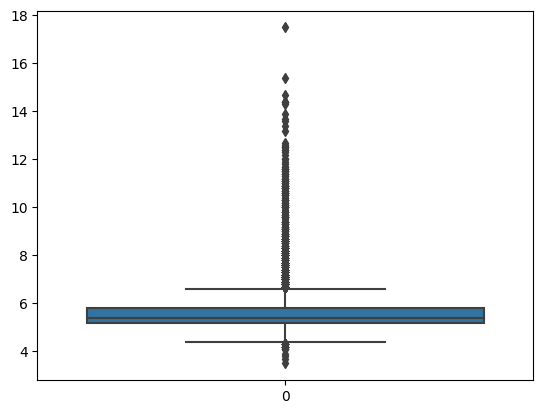

Outliers are : [7000 9222]


In [30]:
func.remove_outliers_by_target()

In [31]:
print('\033[1m' + '\n Shape After Treating Outliers:' + '\033[0m', df_main.shape)


 Shape After Treating Outliers: (9811, 42)


In [32]:
df_main.describe()

,GlycoHemoglobin,Glucose_lab,Osmolality_lab,Age_while_screening,Health_conditions_by_hospital,Triglycerides_lab,Total_prescribed_meds,Current_health_status,Blood_urea_nitrogen_lab,Albumin_urine_lab,...,ever_percsribed_med_lower_cholestrol,Sodium_lab,Reduced_salt_consumption,Weight_history,Body_measurement_upper_leg,ever_perscribed_aspirin,Iron_lab,Increasing_weight,SEQN,Diabetes
count,6641.000000,6552.000000,6552.000000,9811.000000,9811.000000,6548.000000,3968.000000,6465.000000,6552.000000,8050.000000,...,4483.000000,6552.000000,6264.000000,6264.000000,7400.000000,3706.000000,6526.000000,9173.000000,9811.000000,6641.000000
mean,5.639301,102.226954,279.272131,31.625420,2.409744,143.084911,3.459677,2.767827,12.862179,41.122262,...,1.697078,139.783883,1.507184,1.952905,38.577959,1.676201,83.451425,1.077728,78643.881867,0.407920
std,0.987169,38.379993,5.022249,24.398289,1.092502,134.550291,2.921006,0.970999,5.993643,238.817534,...,0.546506,2.214287,0.513537,1.012544,4.048183,0.551147,36.394994,0.267758,2938.461858,0.650295
min,3.500000,49.000000,237.000000,0.000000,1.000000,19.000000,1.000000,1.000000,1.000000,0.210000,...,1.000000,119.000000,1.000000,1.000000,24.400000,1.000000,5.000000,1.000000,73557.000000,0.000000
25%,5.200000,86.000000,276.000000,10.000000,1.000000,72.000000,1.000000,2.000000,9.000000,4.500000,...,1.000000,139.000000,1.000000,1.000000,36.000000,1.000000,59.000000,1.000000,76091.500000,0.000000
50%,5.400000,93.000000,279.000000,27.000000,2.000000,111.000000,2.000000,3.000000,12.000000,8.400000,...,2.000000,140.000000,2.000000,1.000000,38.600000,2.000000,79.000000,1.000000,78642.000000,0.000000
75%,5.800000,104.000000,282.000000,52.000000,3.000000,175.000000,5.000000,3.000000,15.000000,17.600000,...,2.000000,141.000000,2.000000,3.000000,41.300000,2.000000,103.000000,1.000000,81190.500000,1.000000
max,14.700000,577.000000,323.000000,80.000000,9.000000,6057.000000,23.000000,9.000000,95.000000,9600.000000,...,9.000000,154.000000,9.000000,9.000000,51.900000,9.000000,557.000000,2.000000,83731.000000,2.000000


In [33]:
df_main = df_main.drop(['GlycoHemoglobin'], axis=1)
df_main = df_main.drop(['SEQN'], axis=1)
df_main.head()

,Glucose_lab,Osmolality_lab,Age_while_screening,Health_conditions_by_hospital,Triglycerides_lab,Total_prescribed_meds,Current_health_status,Blood_urea_nitrogen_lab,Albumin_urine_lab,BP_cuff_size,...,Direct_HDL_Cholesterol_lab,ever_percsribed_med_lower_cholestrol,Sodium_lab,Reduced_salt_consumption,Weight_history,Body_measurement_upper_leg,ever_perscribed_aspirin,Iron_lab,Increasing_weight,Diabetes
0,554.0,296.0,69,2,140.0,2.0,2.0,10.0,4.3,4.0,...,65.0,1.0,136.0,1.0,3.0,39.2,1.0,58.0,1.0,2.0
1,219.0,265.0,54,4,257.0,4.0,4.0,16.0,153.0,4.0,...,50.0,1.0,128.0,2.0,3.0,40.0,1.0,79.0,1.0,2.0
2,183.0,288.0,72,3,51.0,5.0,3.0,14.0,11.9,4.0,...,60.0,1.0,142.0,2.0,3.0,40.0,2.0,98.0,1.0,2.0
3,NaN,NaN,9,2,NaN,NaN,NaN,NaN,16.0,2.0,...,61.0,NaN,NaN,NaN,NaN,33.5,NaN,NaN,1.0,NaN
4,104.0,290.0,73,5,88.0,4.0,5.0,31.0,255.0,3.0,...,85.0,2.0,142.0,2.0,2.0,36.3,1.0,91.0,1.0,0.0


## *`Imputing Null Values`*

In [34]:
featuresTreatedByMedian = ['Osmolality_lab','Health_conditions_by_hospital','Total_prescribed_meds','Current_health_status',
'Albumin_urine_lab','BP_cuff_size', 'TC_UR_1Molar','TC_UL_1Molar',
'TC_LL_2Molar','TC_UL_2BicuspidOrPrimaryMolar','TC_UP_2BicuspidOr2Molar','TC_LR_1Molar','TC_LL_1Molar',
'SP_diagnosed_diabetes','Taking_insulin','Advised_to_ControlOrLoseWeight',
'Advised_to_reduce_FatOrCalories','Have_taken_any_med_in_30days',
'Advised_to_increase_PhysicalActivityOrExercise','Aadvised_to_reduce_sodium','Overweight',
'Doc_ever_told_SP_high_BP','ever_percsribed_med_lower_cholestrol','Sodium_lab',
'Reduced_salt_consumption','Weight_history','ever_perscribed_aspirin','Diabetes',
'Chloride_lab','Increasing_weight','TC_UL_2Molar']

featuresTreatedByMean = ['Age_while_screening', 'Triglycerides_lab', 'Glucose_lab','Blood_urea_nitrogen_lab','HH_person_age_in_years','Albumin_lab',
'Direct_HDL_Cholesterol_lab','Body_measurement_upper_leg','Iron_lab']


In [35]:
df_main = func.treat_by_median(df_main, featuresTreatedByMedian)
df_main = func.treat_by_mean(df_main, featuresTreatedByMean)

In [36]:
func.check_for_nulls_per(df_main)

                                                \n Null Values By Count \n  \
Glucose_lab                                                                      0   
Advised_to_reduce_FatOrCalories                                                  0   
Have_taken_any_med_in_30days                                                     0   
Advised_to_increase_PhysicalActivityOrExercise                                   0   
Aadvised_to_reduce_sodium                                                        0   
Chloride_lab                                                                     0   
Albumin_lab                                                                      0   
Overweight                                                                       0   
Advised_to_ControlOrLoseWeight                                                   0   
Doc_ever_told_SP_high_BP                                                         0   
ever_percsribed_med_lower_cholestrol                          

# Visualization:

In [49]:
#df_main.to_csv('https://drive.google.com/drive/u/1/my-drive/df_main.csv', index=False)

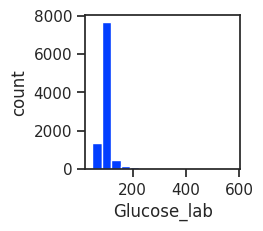

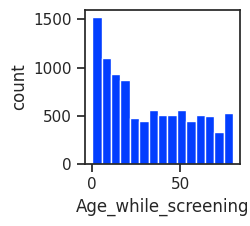

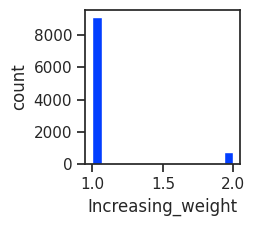

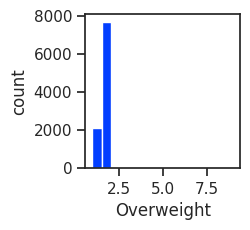

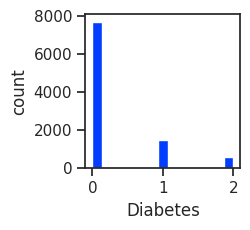

In [39]:
viz.plot_Histogram('Glucose_lab',df_main)
viz.plot_Histogram('Age_while_screening',df_main)
viz.plot_Histogram('Increasing_weight',df_main)
viz.plot_Histogram('Overweight',df_main)
viz.plot_Histogram('Diabetes',df_main)


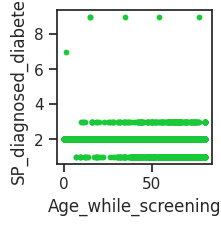

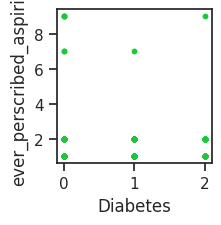

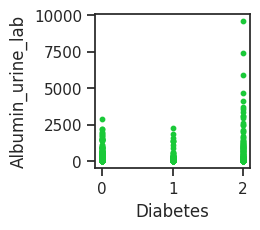

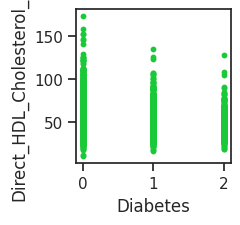

In [40]:
viz.plot_scatteredplot('Age_while_screening','SP_diagnosed_diabetes', df_main)
viz.plot_scatteredplot('Diabetes','ever_perscribed_aspirin', df_main)
viz.plot_scatteredplot('Diabetes','Albumin_urine_lab', df_main)
viz.plot_scatteredplot('Diabetes','Direct_HDL_Cholesterol_lab', df_main)


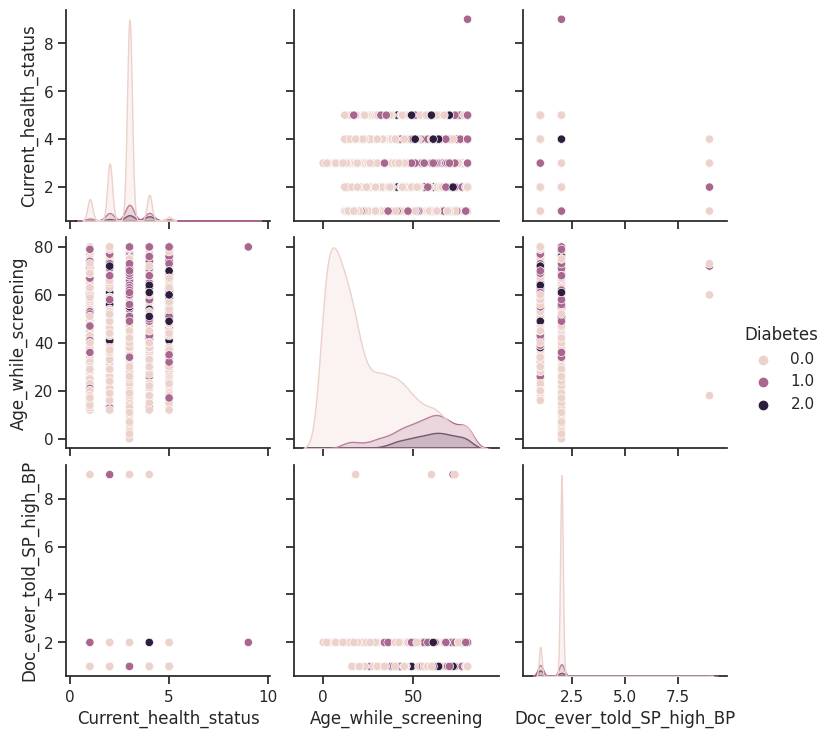

In [57]:
sns.pairplot(df_main, hue='Diabetes', vars=["Current_health_status","Age_while_screening", "Doc_ever_told_SP_high_BP"])

<Axes: xlabel='Diabetes', ylabel='Body_measurement_upper_leg'>

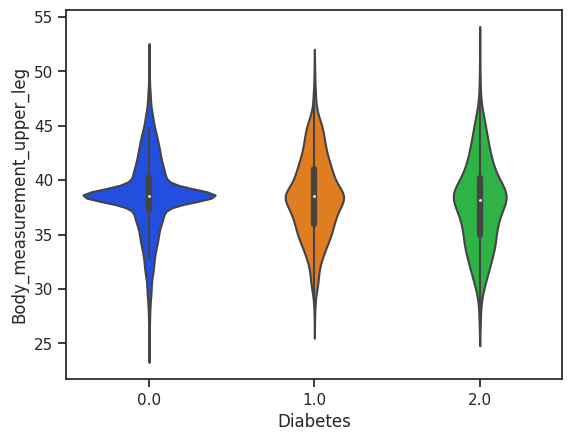

In [58]:
sns.violinplot(x="Diabetes", y="Body_measurement_upper_leg", data=df_main)

<Axes: xlabel='Diabetes', ylabel='Total_prescribed_meds'>

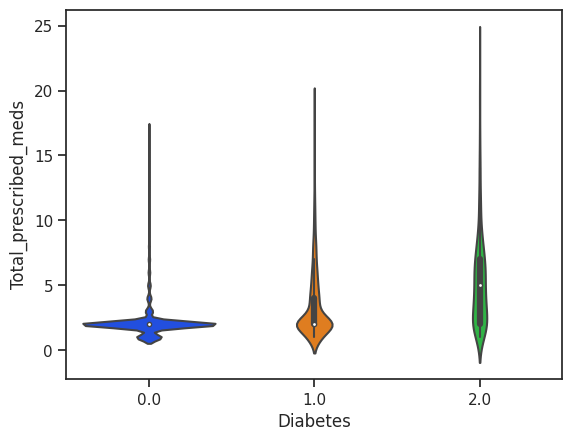

In [59]:
sns.violinplot(x="Diabetes", y="Total_prescribed_meds", data=df_main)

In [50]:
df_main.columns

Index(['Glucose_lab', 'Osmolality_lab', 'Age_while_screening',
       'Health_conditions_by_hospital', 'Triglycerides_lab',
       'Total_prescribed_meds', 'Current_health_status',
       'Blood_urea_nitrogen_lab', 'Albumin_urine_lab', 'BP_cuff_size',
       'TC_UR_1Molar', 'TC_UL_1Molar', 'TC_LL_2Molar',
       'TC_UL_2BicuspidOrPrimaryMolar', 'TC_UP_2BicuspidOr2Molar',
       'HH_person_age_in_years', 'TC_LR_1Molar', 'TC_LL_1Molar',
       'TC_UL_2Molar', 'SP_diagnosed_diabetes', 'Taking_insulin',
       'Advised_to_ControlOrLoseWeight', 'Advised_to_reduce_FatOrCalories',
       'Have_taken_any_med_in_30days',
       'Advised_to_increase_PhysicalActivityOrExercise',
       'Aadvised_to_reduce_sodium', 'Chloride_lab', 'Albumin_lab',
       'Overweight', 'Doc_ever_told_SP_high_BP', 'Direct_HDL_Cholesterol_lab',
       'ever_percsribed_med_lower_cholestrol', 'Sodium_lab',
       'Reduced_salt_consumption', 'Weight_history',
       'Body_measurement_upper_leg', 'ever_perscribed_aspirin',

# Data Preparation:

In [51]:
x = df_main.drop(['Diabetes'], axis=1)
y = df_main[['Diabetes']]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Feature Selection 

## ANOVA f-test Feature Selection


 The most important  20 features: 

0 - Glucose_lab :  3136.9069868315964
1 - Age_while_screening :  2095.758547834846
2 - SP_diagnosed_diabetes :  1472.291800896011
3 - Taking_insulin :  1001.8912579812164
4 - Total_prescribed_meds :  946.9777754697581
5 - HH_person_age_in_years :  833.8896635540414
6 - Doc_ever_told_SP_high_BP :  818.6561385690642
7 - ever_percsribed_med_lower_cholestrol :  777.0590118490721
8 - Advised_to_increase_PhysicalActivityOrExercise :  742.6875682138065
9 - ever_perscribed_aspirin :  684.5075581101651
10 - Have_taken_any_med_in_30days :  677.040186668701
11 - Advised_to_ControlOrLoseWeight :  667.9279910416307
12 - Reduced_salt_consumption :  562.7981786133109
13 - Advised_to_reduce_FatOrCalories :  562.5854263154645
14 - Aadvised_to_reduce_sodium :  514.2395604358762
15 - Overweight :  501.76662249538896
16 - TC_UL_2BicuspidOrPrimaryMolar :  500.58592796646417
17 - TC_UP_2BicuspidOr2Molar :  496.60883963096967
18 - Health_conditions_by_hospital :  477.1156

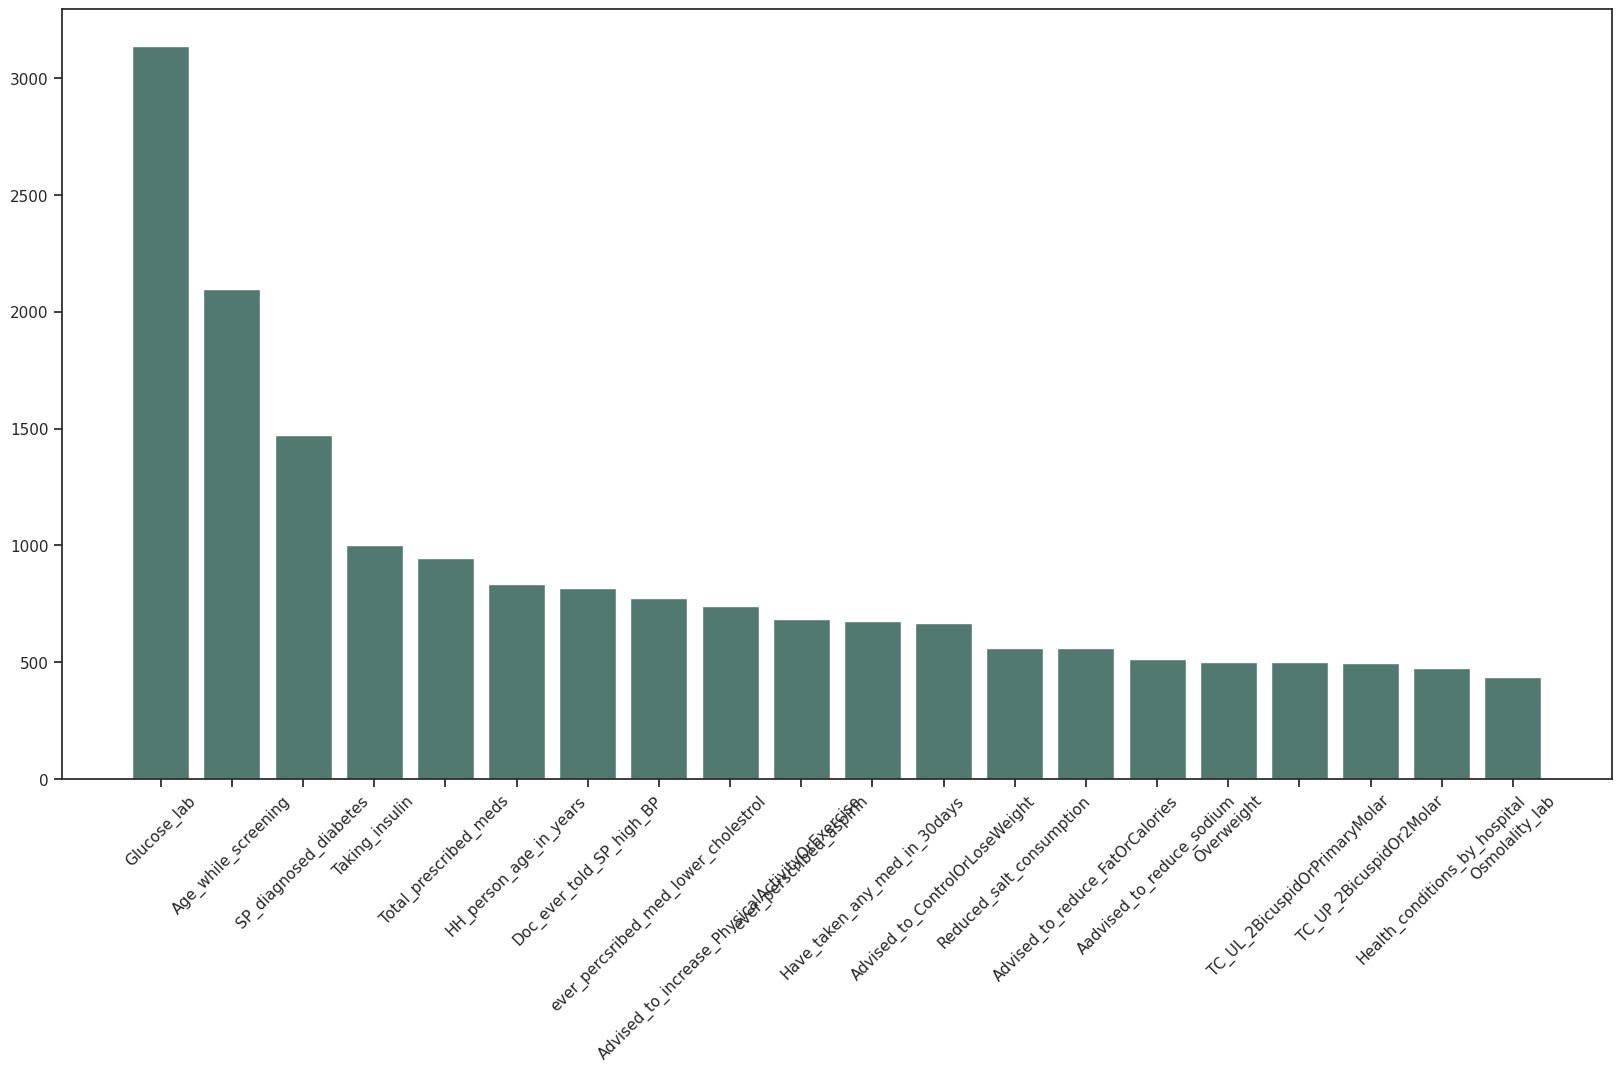

In [53]:
features_ordered, scores_ = feature_imp.print_importances(20)
feature_imp.feature_imp_plot(features_ordered, scores_,20)

## CatBoost Feature Importance


Testing Performance Metrics for the CatBoostClassifier :

                            R2: 0.41
      Mean Squared Error (MSE): 0.18
Root Mean Squared Error (RMSE): 0.43
                      Accuracy: 84.00%

Plotting the Feature Importance Graph for the CatBoostClassifier :



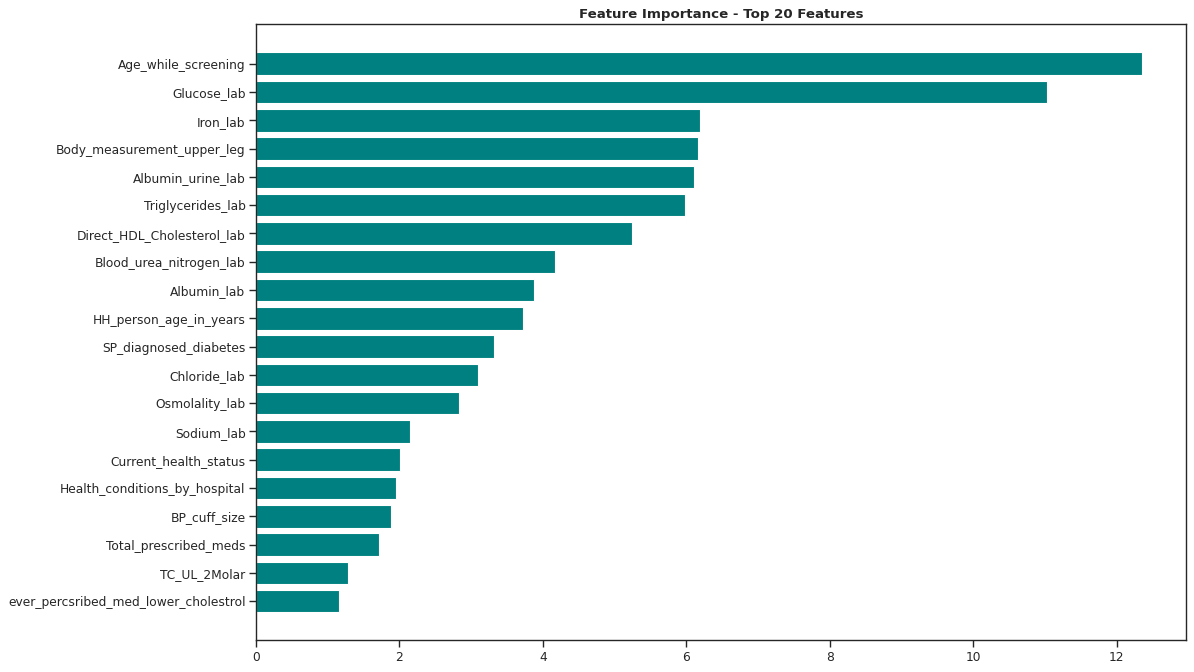

In [54]:
feature_imp.model_train('CatBoostClassifier',X_train,y_train,X_test,y_test)

## XGBoost Feature Importance


Testing Performance Metrics for the XGBClassifier :

                            R2: 0.43
      Mean Squared Error (MSE): 0.18
Root Mean Squared Error (RMSE): 0.42
                      Accuracy: 84.27%

Plotting the Feature Importance Graph for the XGBClassifier :



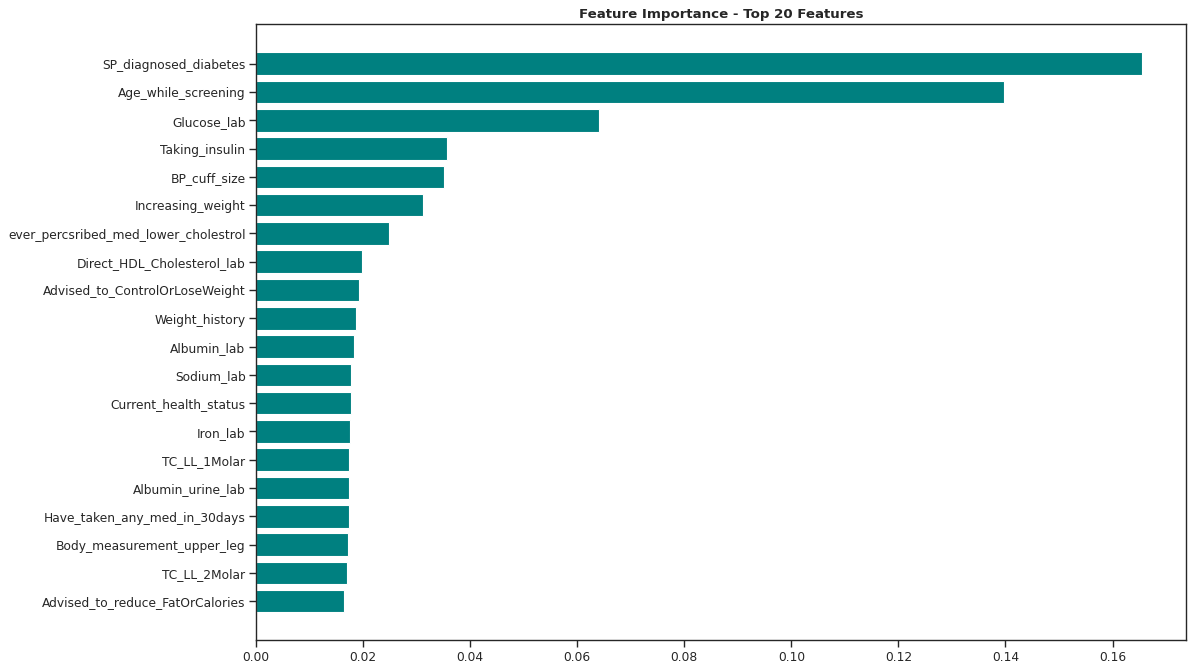

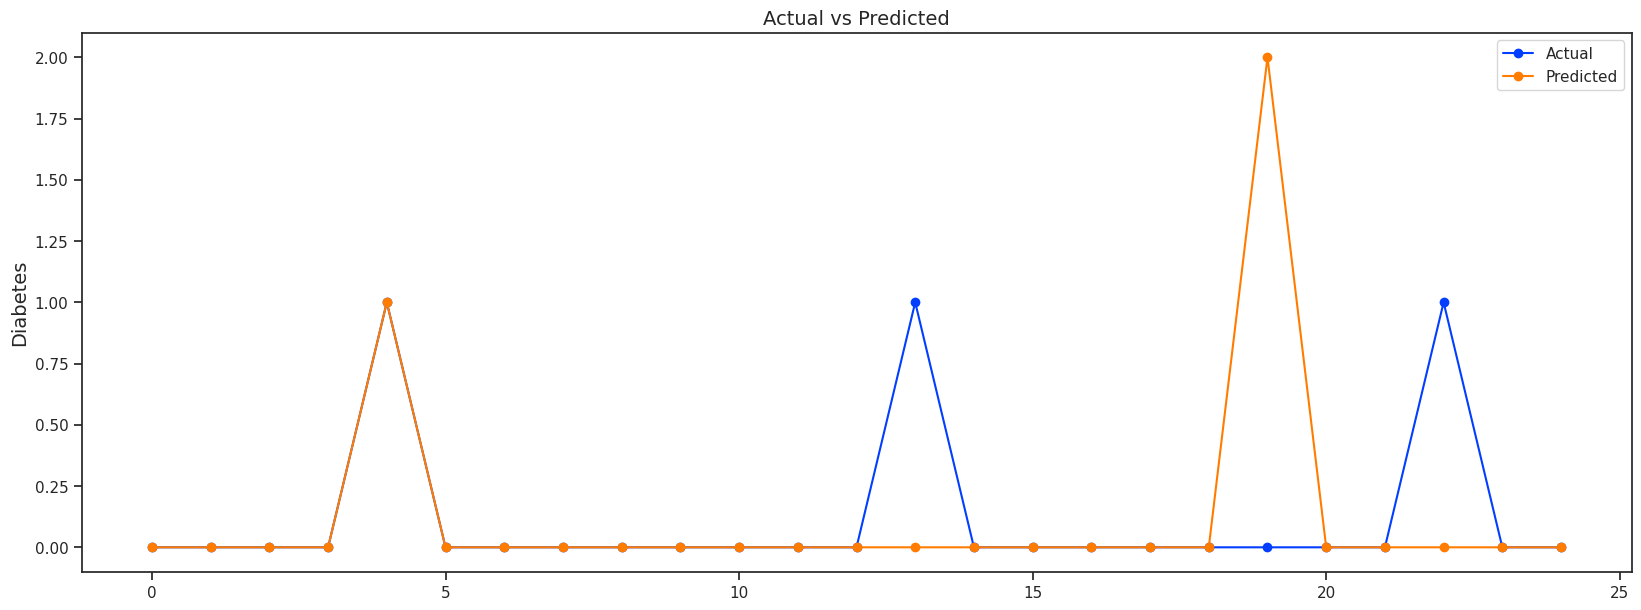

In [55]:
feature_imp.model_train('XGBClassifier',X_train,y_train,X_test,y_test)

## Random Forest Feature Importance


Testing Performance Metrics for the RandomForestClassifier :

                            R2: 0.43
      Mean Squared Error (MSE): 0.17
Root Mean Squared Error (RMSE): 0.42
                      Accuracy: 84.44%

Plotting the Feature Importance Graph for the RandomForestClassifier :



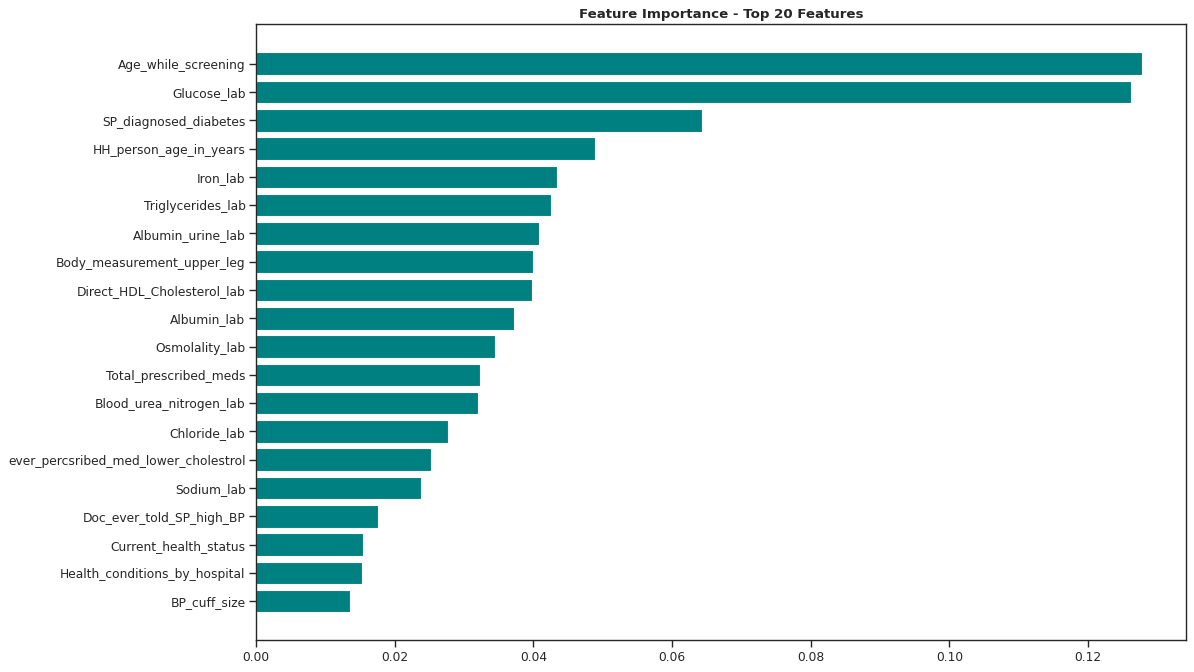

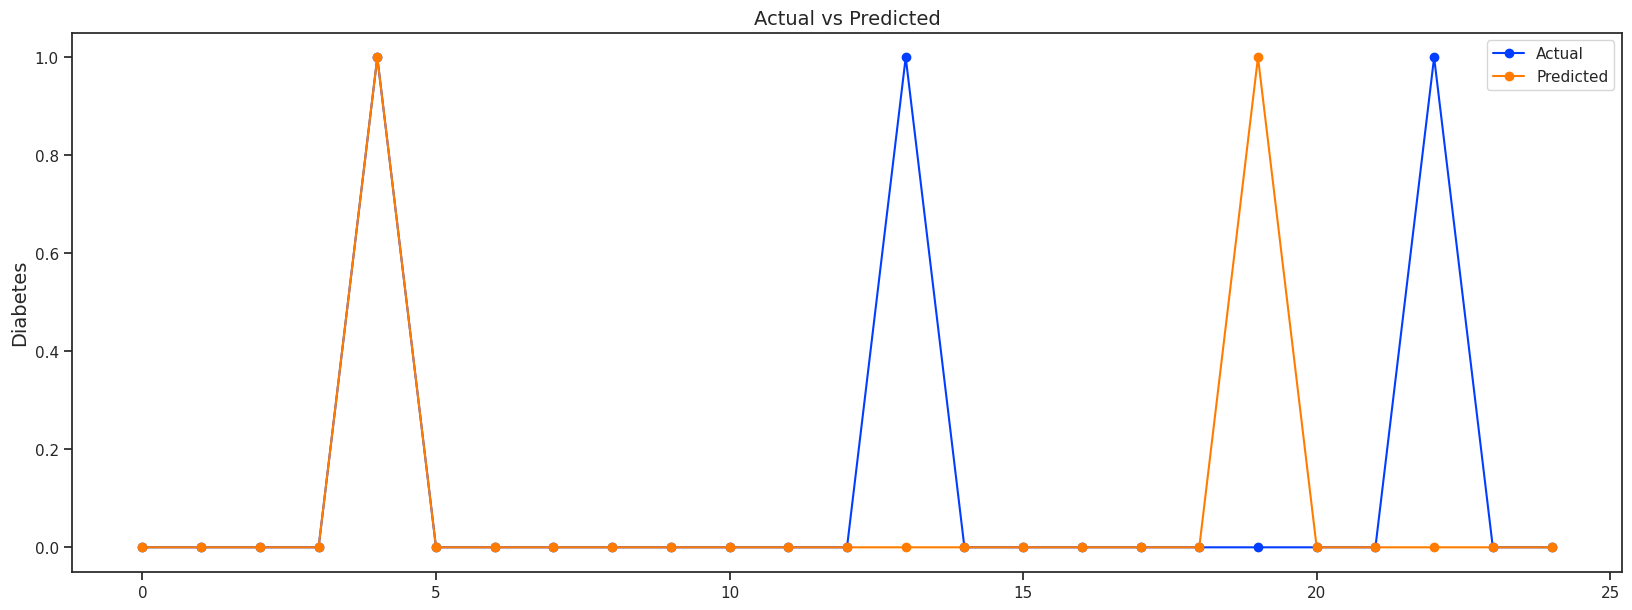

In [56]:
feature_imp.model_train('RandomForestClassifier',X_train,y_train,X_test,y_test)

## Logistic Feature Importance

In [ ]:
feature_imp.logistics_model( X_train, y_train, X_test, y_test)

## Extra Tree Classifier 

In [ ]:
import sklearn
print(sklearn.__version__)

In [ ]:
feature_imp.ExtraTreesClassifier(X_train, y_train, X_test, y_test)





## Logistic Regresiion Feature Importance 

In [ ]:
feature_imp.LogisticRegression(20)
 